In [2]:
import os
import re
import random
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer  # Add TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Data Cleaning and Preprocessing

def clean_text(text):
    # Remove repeated words
    text = re.sub(r'\b(\w+)(\s+\1)+\b', r'\1', text)
    # Remove punctuation, numbers, and special characters
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove past tense
    ps = PorterStemmer()
    tokens = word_tokenize(text)
    tokens = [ps.stem(token) for token in tokens]
    text = ' '.join(tokens)
    return text

def load_dataset(root_folder):
    data = []
    labels = []
    topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']
    for topic in topics:
        folder_path = os.path.join(root_folder, topic)
        files = os.listdir(folder_path)
        for file in files:
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r', encoding='utf-8') as f:  # Specify the encoding
                text = f.read()
                cleaned_text = clean_text(text)
                data.append(cleaned_text)
                labels.append(topic)
    return data, labels

root_folder = "C:/Users/samue/Downloads/data_assessment_2/data_for_topic_labelling"
data, labels = load_dataset(root_folder)

Classifier 1:
              precision    recall  f1-score   support

    accounts       1.00      0.98      0.99        57
     biology       0.96      0.99      0.98       127
   geography       1.00      0.75      0.86        20
     history       1.00      0.95      0.97       100
       maths       1.00      1.00      1.00        43
     physics       0.98      0.99      0.99       154
    software       0.96      1.00      0.98       128

    accuracy                           0.98       629
   macro avg       0.99      0.95      0.97       629
weighted avg       0.98      0.98      0.98       629

Classifier 2:
              precision    recall  f1-score   support

    accounts       1.00      0.98      0.99        57
     biology       0.96      0.99      0.98       127
   geography       1.00      0.75      0.86        20
     history       1.00      0.95      0.97       100
       maths       1.00      1.00      1.00        43
     physics       0.98      0.99      0.99       

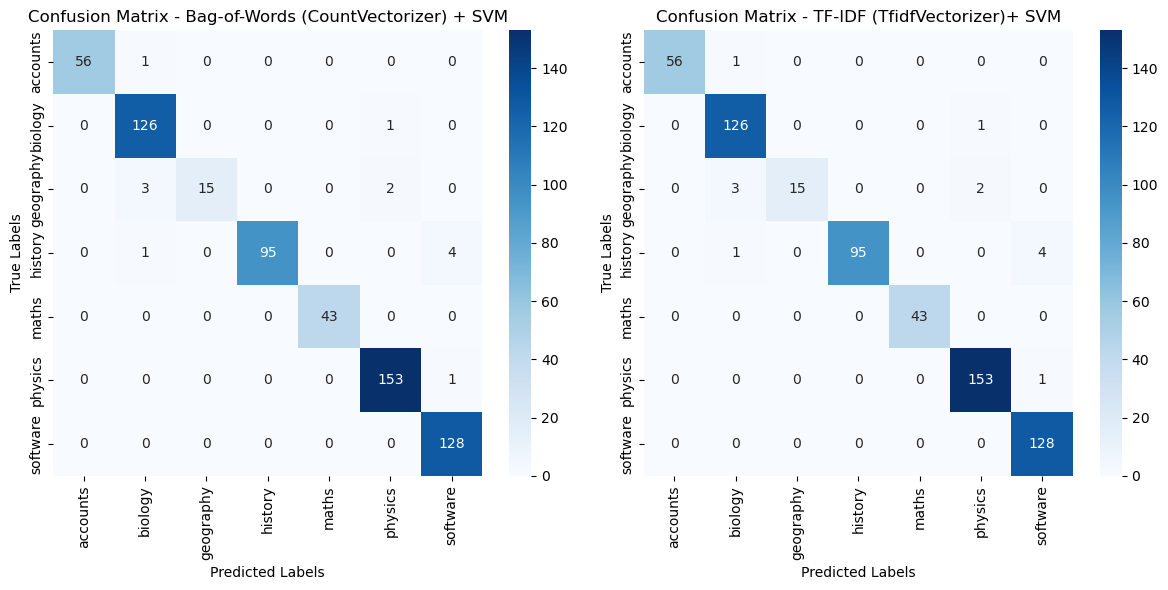

In [3]:
#Step 2: Splitting the Dataset
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, 
                                                                    test_size=0.2, stratify=labels, random_state=42)

# Step 3: Topic Modeling and Classification
# Version 1: Bag-of-Words (CountVectorizer) + SVM
classifier_1 = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC(kernel='linear'))
])

# Version 2: TF-IDF (TfidfVectorizer) + SVM
classifier_2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', SVC(kernel='linear'))
])

# Fit the classifiers on the training data
classifier_1.fit(train_data, train_labels)
classifier_2.fit(train_data, train_labels)
# Evaluate the classifiers on the testing data
pred_labels_1 = classifier_1.predict(test_data)
pred_labels_2 = classifier_2.predict(test_data)

# Step 4: Performance Evaluation
# Define the topics list

topics = ['accounts', 'biology', 'geography', 'history', 'maths', 'physics', 'software']

# Classification report for classifier 1
print("Classifier 1:")
print(classification_report(test_labels, pred_labels_1))

# Classification report for classifier 2
print("Classifier 2:")
print(classification_report(test_labels, pred_labels_2))

# Confusion matrix for classifier 1
cm_1 = confusion_matrix(test_labels, pred_labels_1)
print("Confusion Matrix - Classifier 1:")
print(cm_1)

# Confusion matrix for classifier 2
cm_2 = confusion_matrix(test_labels, pred_labels_2)
print("Confusion Matrix - Classifier 2:")
print(cm_2)

# Plotting the heatmaps
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(cm_1, annot=True, cmap='Blues', fmt='d', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - Bag-of-Words (CountVectorizer) + SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_2, annot=True, cmap='Blues', fmt='d', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - TF-IDF (TfidfVectorizer)+ SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()

Confusion Matrix - Classifier 1:
[[0.98245614 0.01754386 0.         0.         0.         0.
  0.        ]
 [0.         0.99212598 0.         0.         0.         0.00787402
  0.        ]
 [0.         0.15       0.75       0.         0.         0.1
  0.        ]
 [0.         0.01       0.         0.95       0.         0.
  0.04      ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.         0.         0.         0.         0.99350649
  0.00649351]
 [0.         0.         0.         0.         0.         0.
  1.        ]]
Confusion Matrix - Classifier 2:
[[0.98245614 0.01754386 0.         0.         0.         0.
  0.        ]
 [0.         0.99212598 0.         0.         0.         0.00787402
  0.        ]
 [0.         0.15       0.75       0.         0.         0.1
  0.        ]
 [0.         0.01       0.         0.95       0.         0.
  0.04      ]
 [0.         0.         0.         0.         1.         0.
  0.        ]
 [0.         0.    

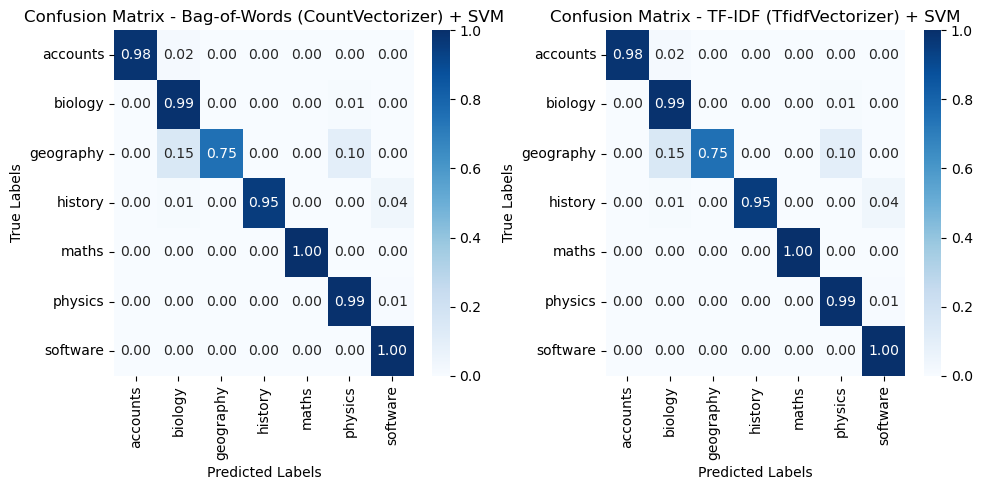

In [8]:
# Confusion matrix for classifier 1
cm_1 = confusion_matrix(test_labels, pred_labels_1)
cm_1_norm = cm_1 / cm_1.sum(axis=1, keepdims=True)  # Normalized confusion matrix

print("Confusion Matrix - Classifier 1:")
print(cm_1_norm)

# Confusion matrix for classifier 2
cm_2 = confusion_matrix(test_labels, pred_labels_2)
cm_2_norm = cm_2 / cm_2.sum(axis=1, keepdims=True)  # Normalized confusion matrix

print("Confusion Matrix - Classifier 2:")
print(cm_2_norm)

# Plotting the heatmaps
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_1_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - Bag-of-Words (CountVectorizer) + SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.subplot(1, 2, 2)
sns.heatmap(cm_2_norm, annot=True, cmap='Blues', fmt='.2f', xticklabels=topics, yticklabels=topics)
plt.title("Confusion Matrix - TF-IDF (TfidfVectorizer) + SVM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.tight_layout()
plt.show()


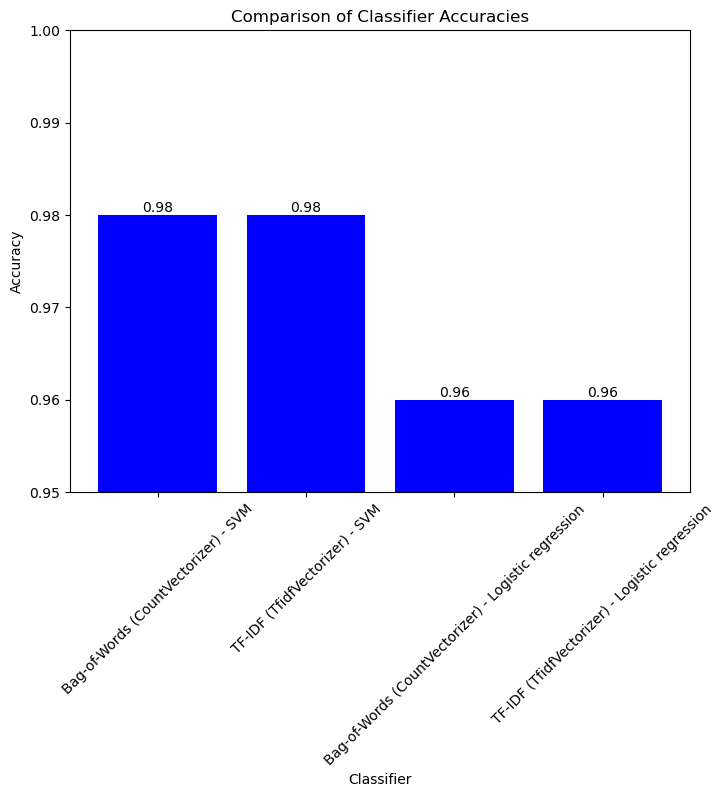

In [9]:
import matplotlib.pyplot as plt

classifiers = ['Bag-of-Words (CountVectorizer) - SVM', 'TF-IDF (TfidfVectorizer) - SVM', 'Bag-of-Words (CountVectorizer) - Logistic regression', 'TF-IDF (TfidfVectorizer) - Logistic regression']
accuracies = [0.98, 0.98, 0.96, 0.96]

# Plotting the results
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color='blue')
plt.ylim(0.95, 1.0)
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.title('Comparison of Classifier Accuracies')
plt.xticks(rotation=45)

# Adding the accuracy values to the bars
for i in range(len(classifiers)):
    plt.text(i, accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()
